<a href="https://colab.research.google.com/github/DavidPolot/cap-comp215/blob/main/project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##David Polotsky
2nd Project, cellular automation of the spread of COVID

can we use cellular automation to visualize and generalize the spread of a virus like COVID

In [39]:

%matplotlib inline

import math
import time
from dataclasses import dataclass

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
from scipy.signal import correlate2d

# Configure matplotlib's animation library to work in the browser.
matplotlib.rc('animation', html='jshtml')

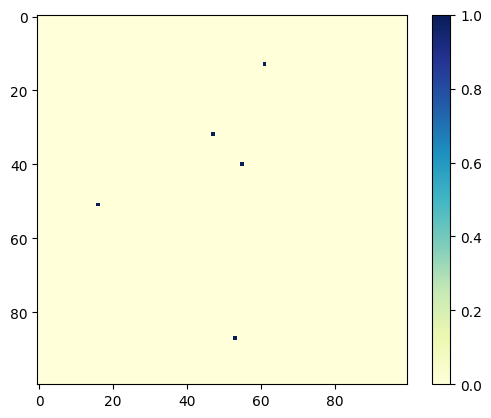

In [40]:
# this is the working code, (ish) i just want to animate on one window but it seems like nothing i do works
#this code was writeen by the support of chatgpt, understood and clarified by me.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters
GRID_SIZE = 100
INITIAL_INFECTED = 5
TRANSMISSION_PROBABILITY = 0.3
RECOVERY_PROBABILITY = 0.1  # Probability of recovery
MORTALITY = 0.02  # Probability of death
DAYS_TO_RECOVER = 14  # Number of days for recovery

# Define states
SUSCEPTIBLE = 0
INFECTED = 1
RECOVERED = 2
DEAD = 3

def initialize_grid():
    return np.zeros((GRID_SIZE, GRID_SIZE))

def randomly_infect(grid):
    indices = np.random.choice(range(GRID_SIZE * GRID_SIZE), size=INITIAL_INFECTED, replace=False)
    x, y = indices // GRID_SIZE, indices % GRID_SIZE
    grid[x, y] = INFECTED
    return grid

# Define neighborhood kernel
Neighborhood = np.array([[1, 0], [0, 1], [-1, 0], [0, -1]])

def update_grid(grid):
  #define the rules of the grid
    new_grid = np.copy(grid)
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            if grid[i, j] == INFECTED:
                # Try to infect susceptible neighbors
                for dx, dy in Neighborhood: #difference of x and y
                    ni, nj = i + dx, j + dy
                    if 0 <= ni < GRID_SIZE and 0 <= nj < GRID_SIZE and grid[ni, nj] == SUSCEPTIBLE and np.random.rand() < TRANSMISSION_PROBABILITY:
                        new_grid[ni, nj] = INFECTED
                # Check for recovery or death
                if np.random.rand() < RECOVERY_PROBABILITY:
                    new_grid[i, j] = DEAD if np.random.rand() < MORTALITY else RECOVERED
    return new_grid

def display_grid(grid, day):
    plt.imshow(grid, cmap='YlGnBu')
    plt.colorbar()
    plt.title(f'Day {day}')
    plt.show()


#google gemeni, its the same prompt as the first promt when i used gemeni
def animate(i, grid):  # Pass grid as argument
    grid = update_grid(grid)
    i.set_data(grid)
    plt.title(f'Day {i+1}')  # Update title for each frame
    return i

def main():
    grid = initialize_grid()
    grid = randomly_infect(grid)

    fig, ax = plt.subplots()
    im = ax.imshow(grid, cmap='YlGnBu')
    plt.colorbar(im)

    ani = animation.FuncAnimation(fig, animate, fargs=(grid,), interval=200, frames=100, repeat=False)
    plt.show()

if __name__ == "__main__":
    main()

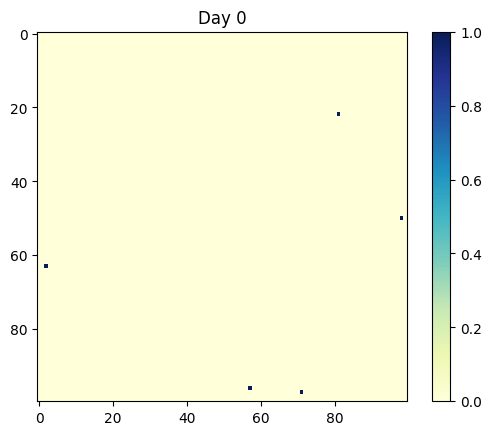

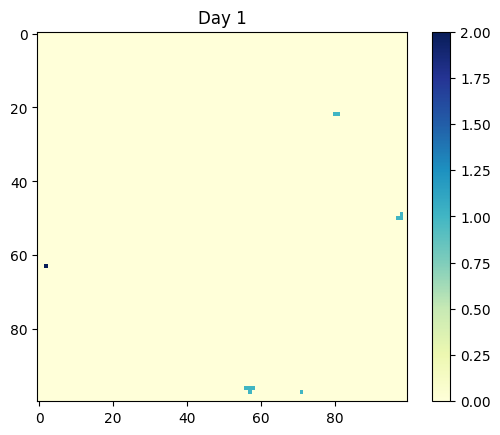

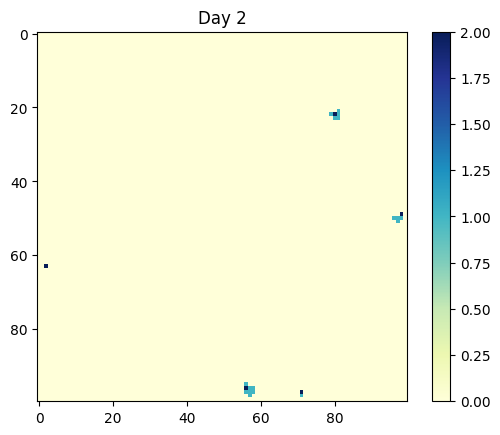

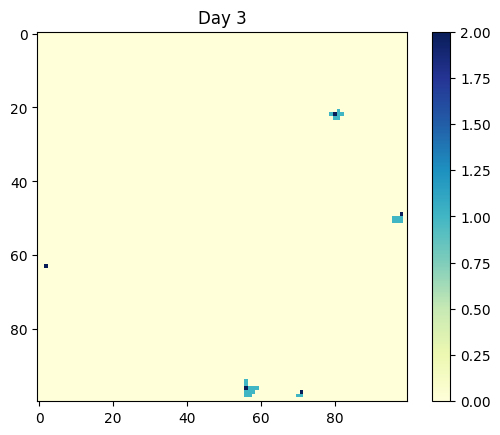

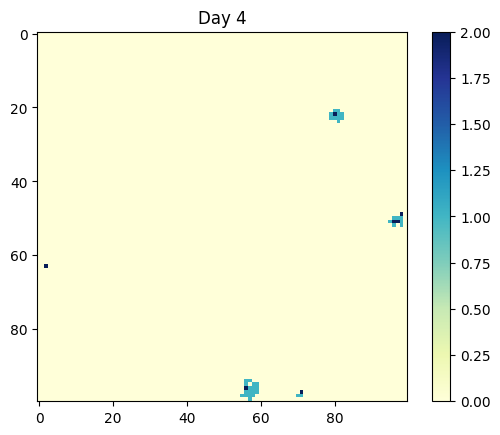

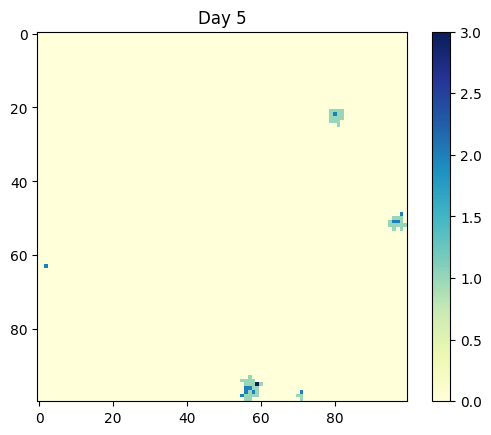

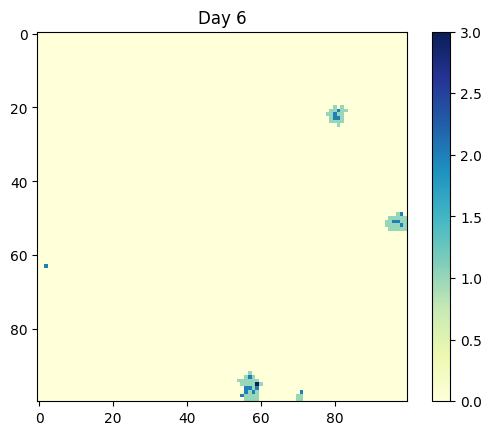

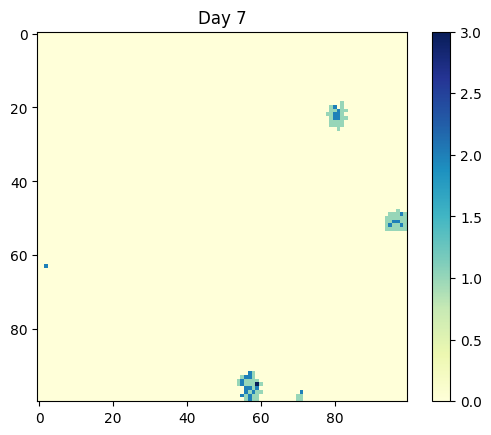

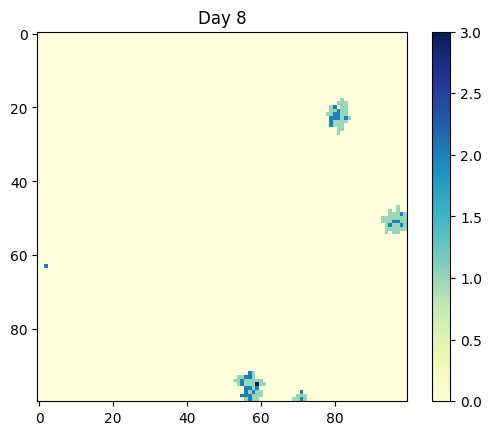

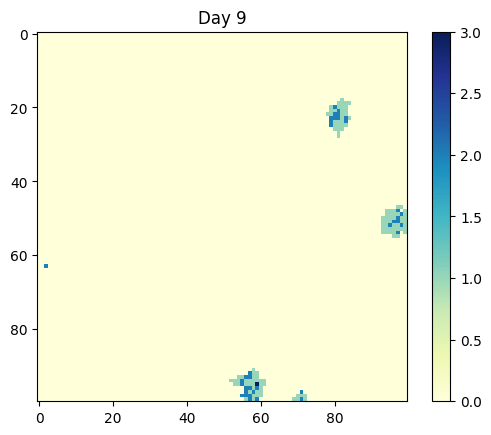

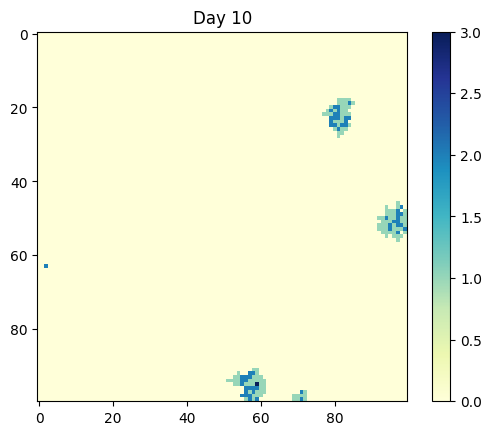

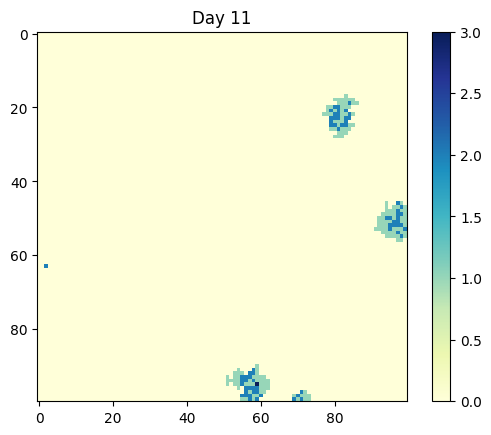

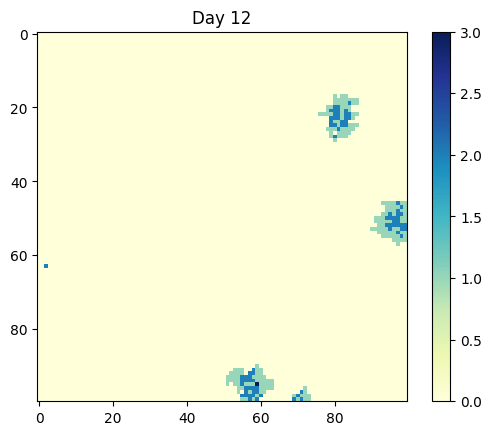

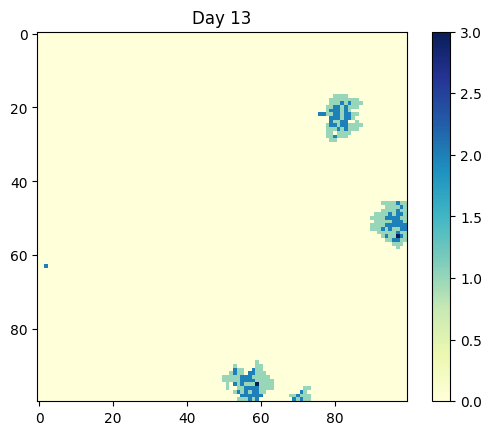

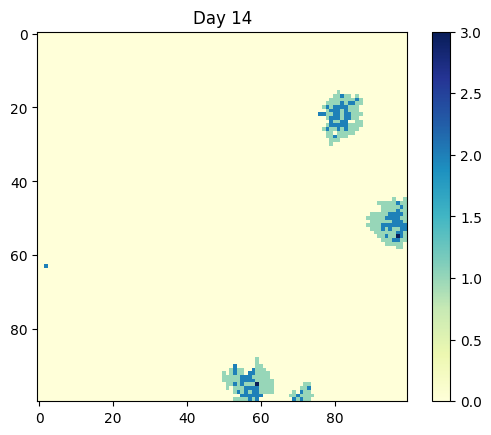

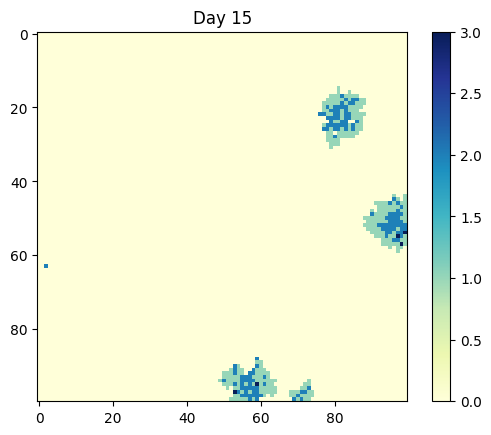

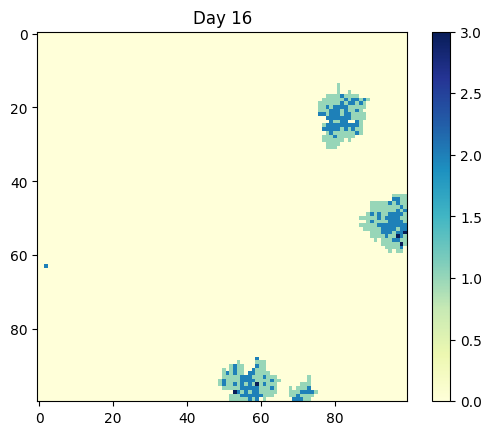

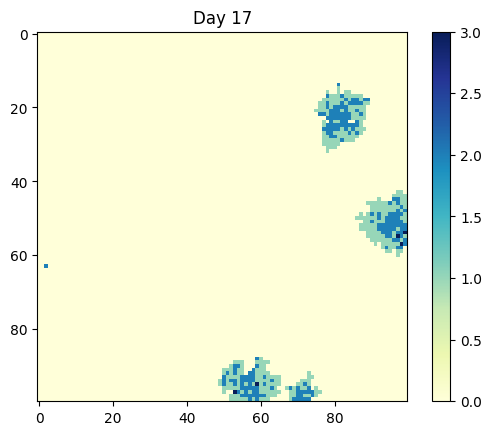

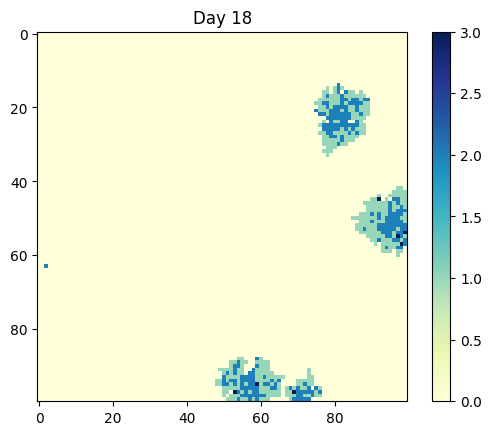

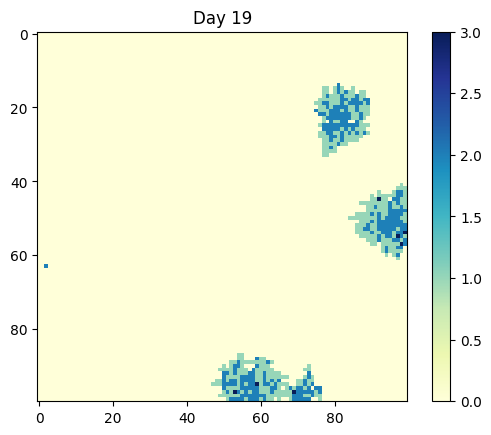

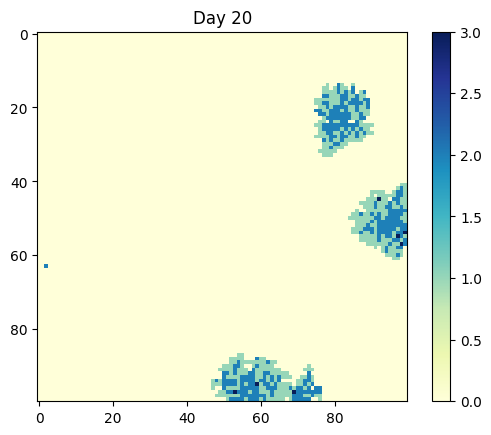

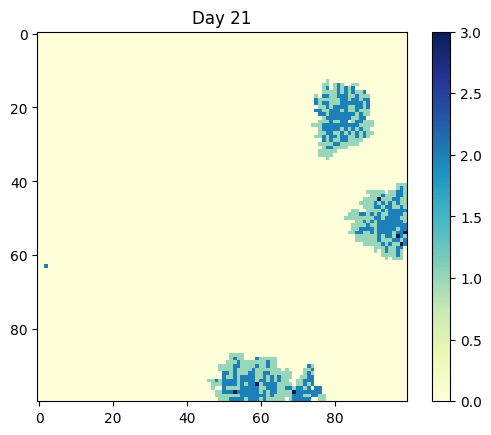

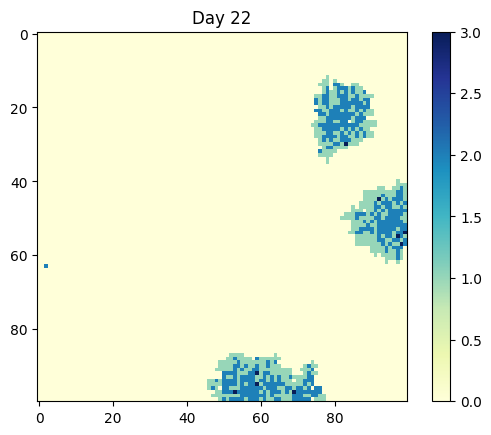

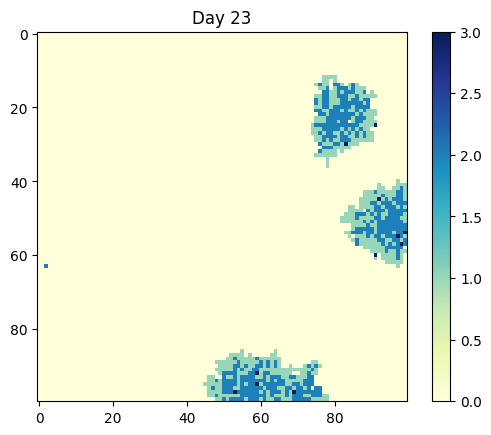

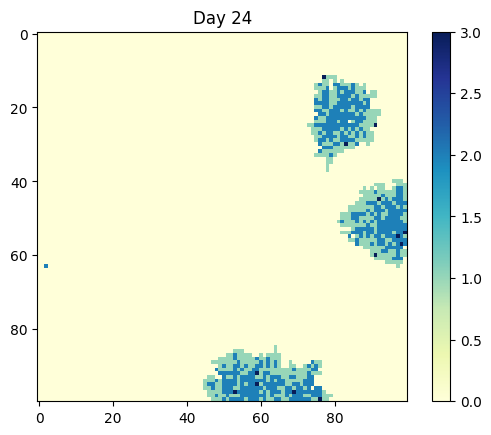

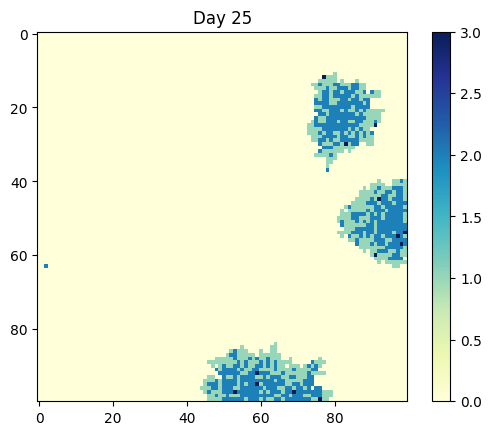

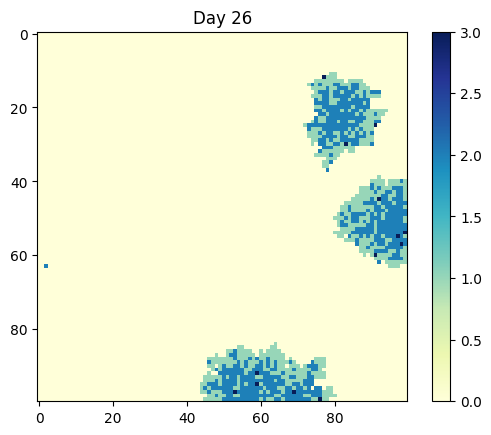

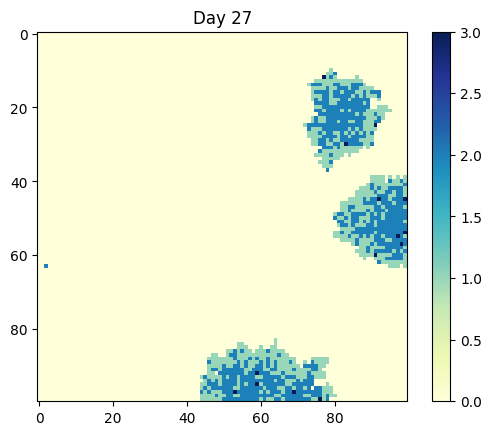

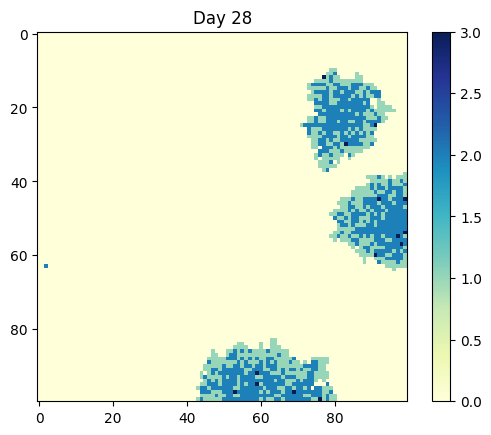

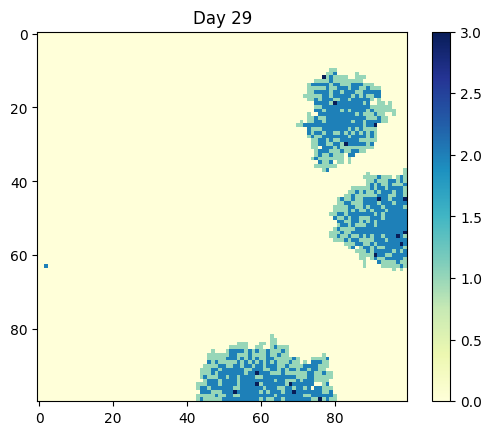

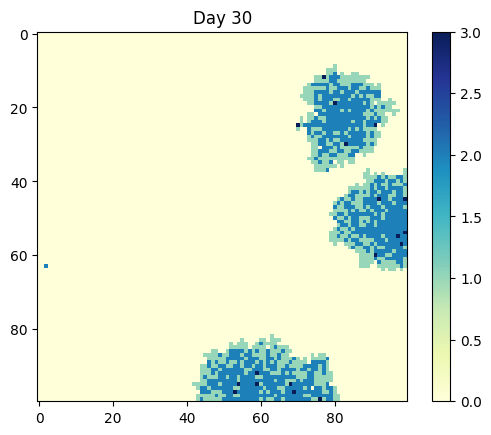

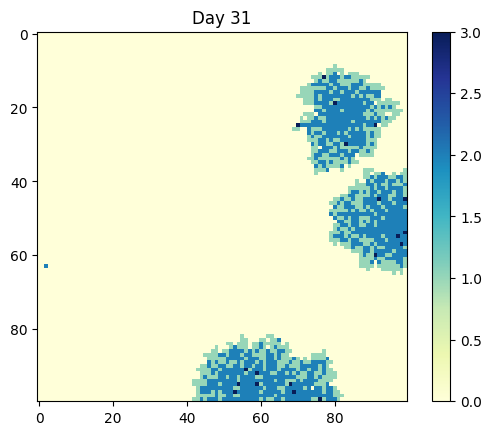

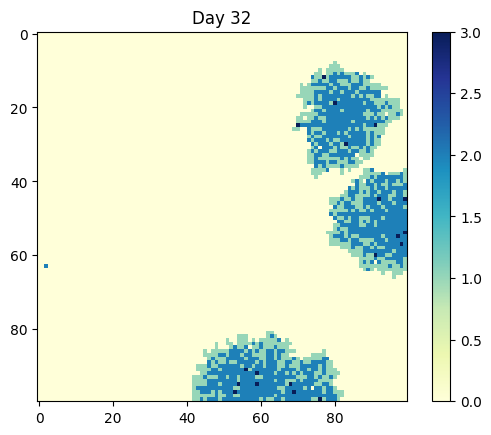

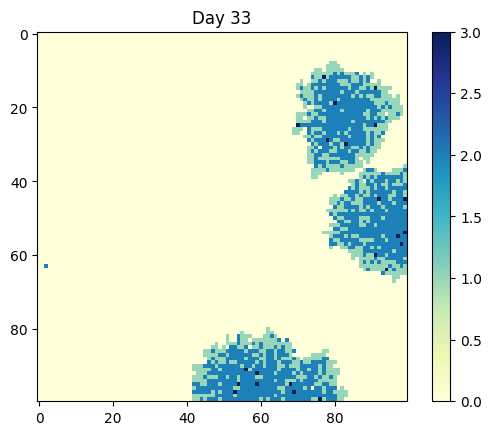

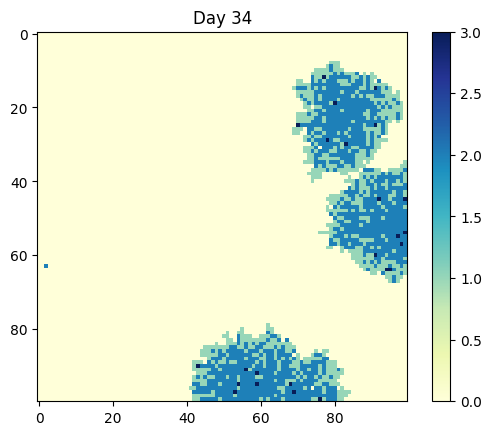

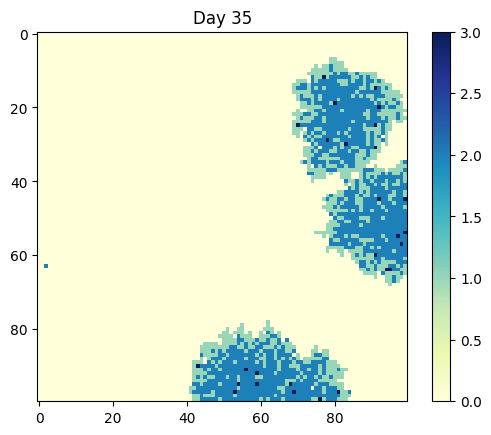

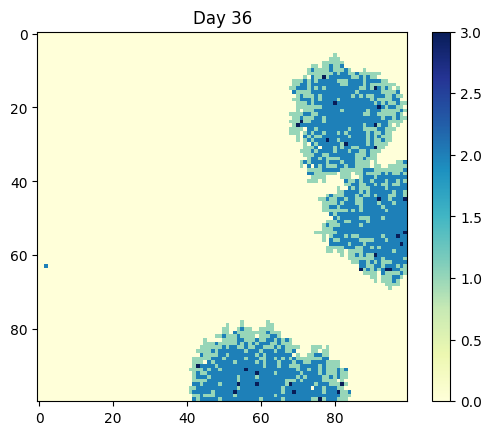

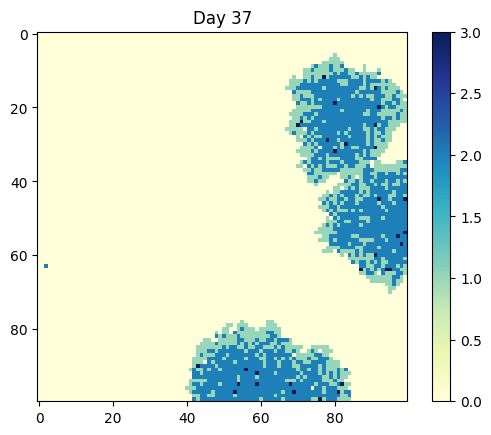

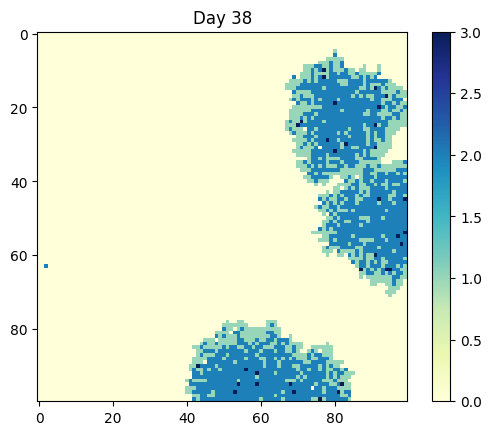

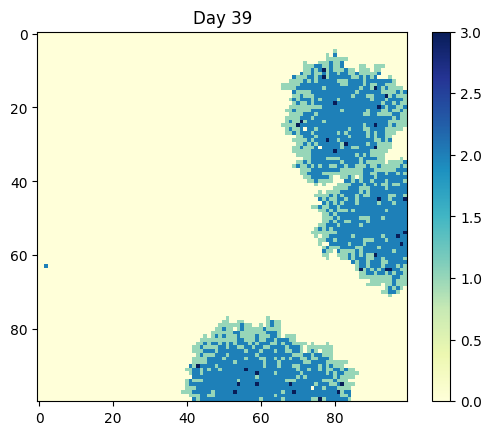

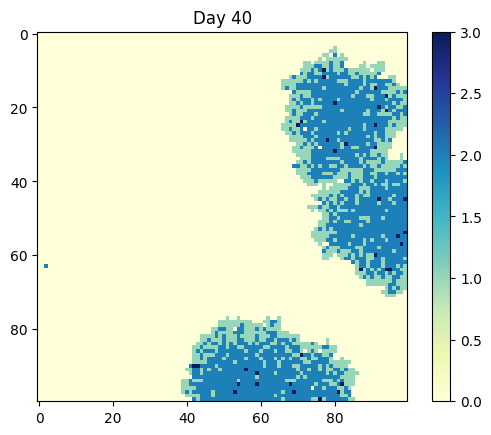

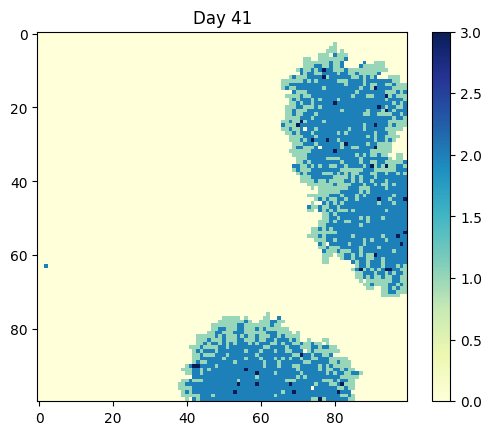

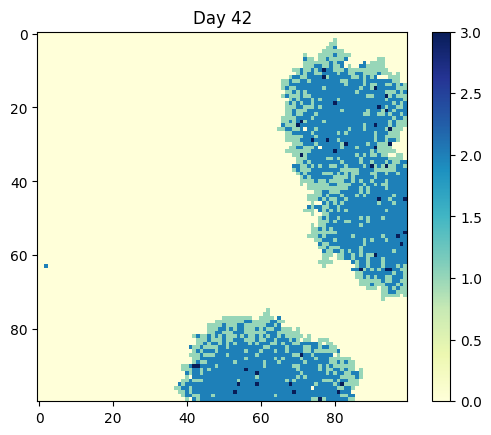

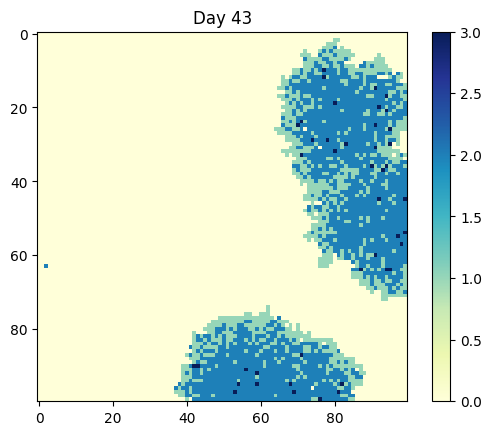

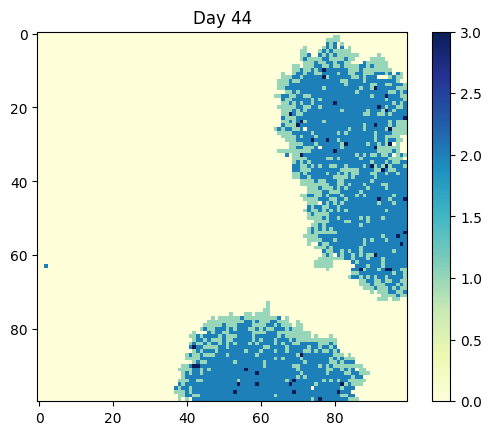

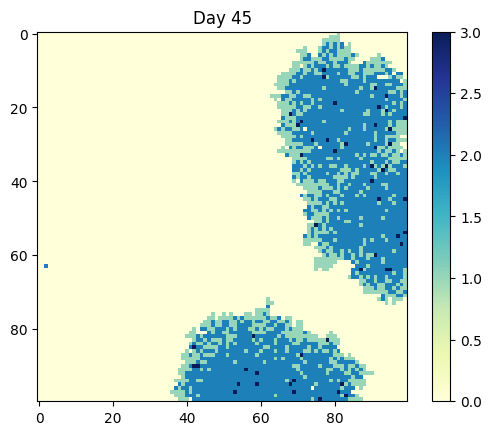

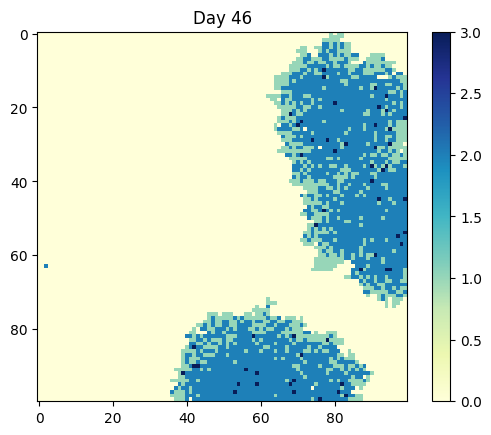

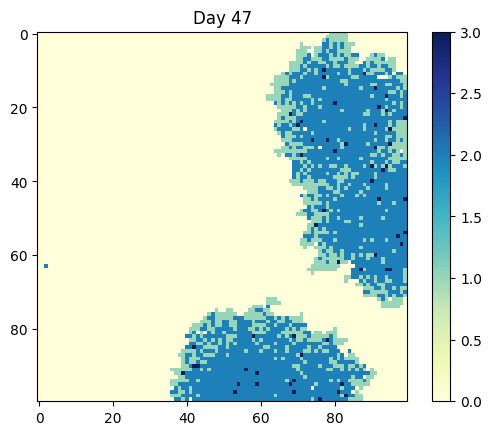

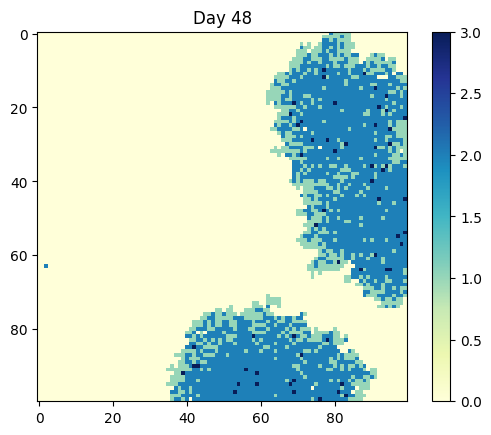

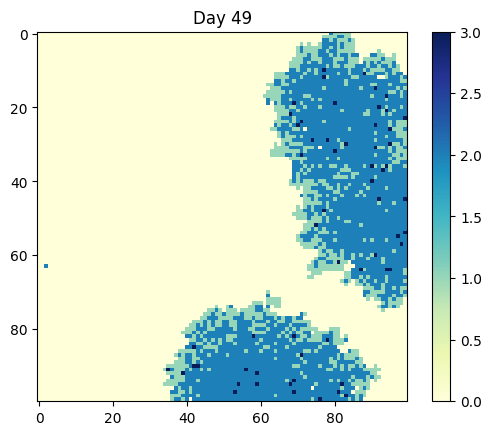

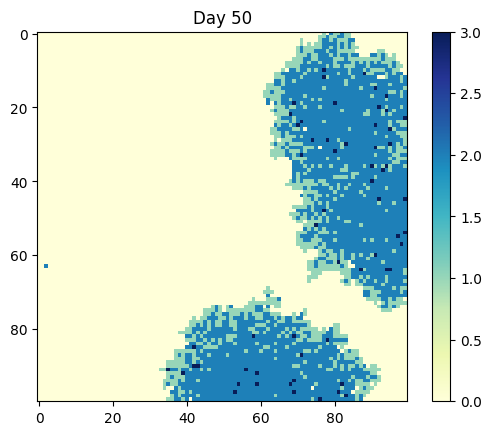

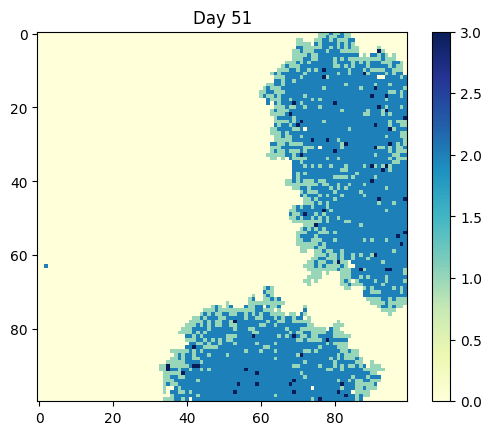

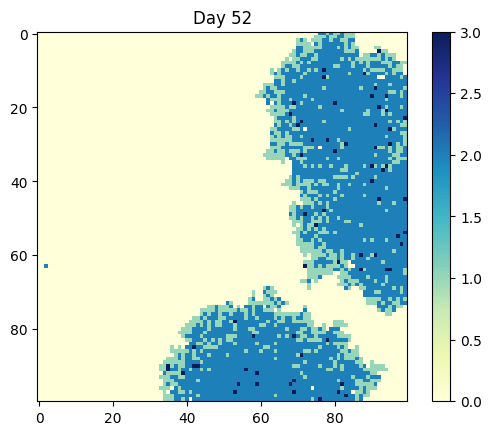

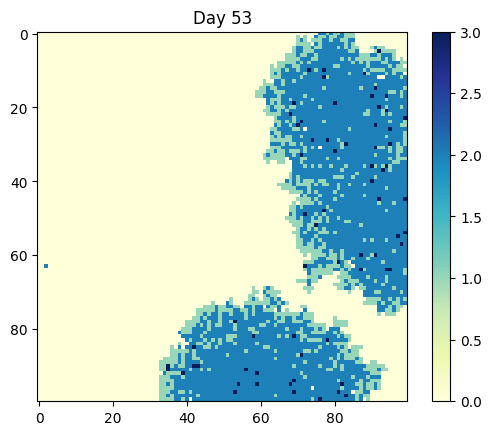

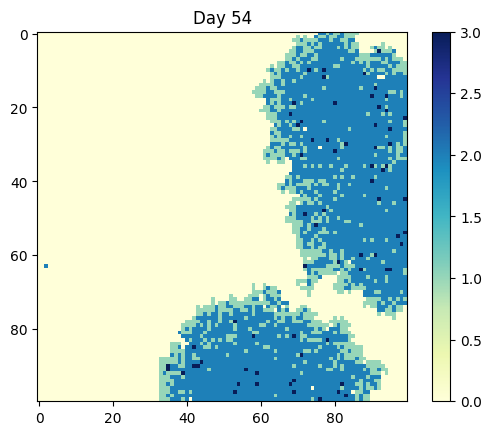

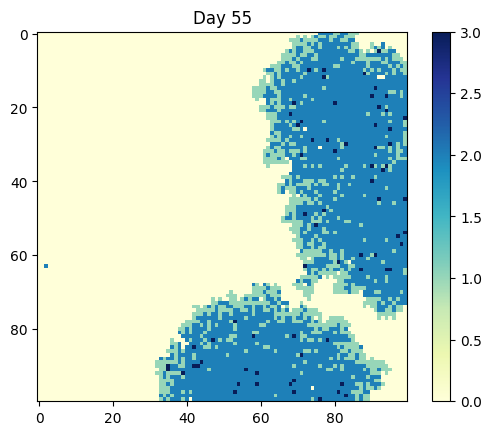

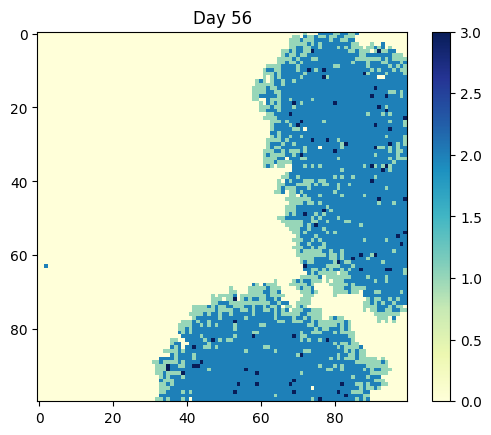

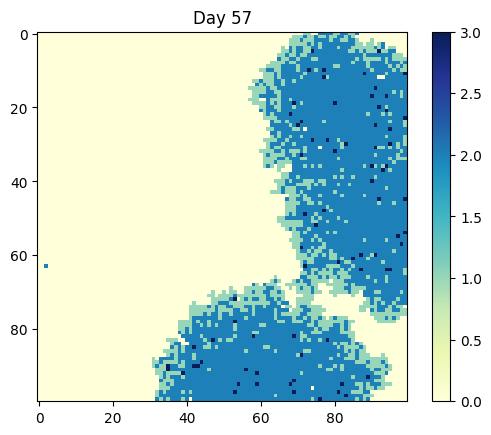

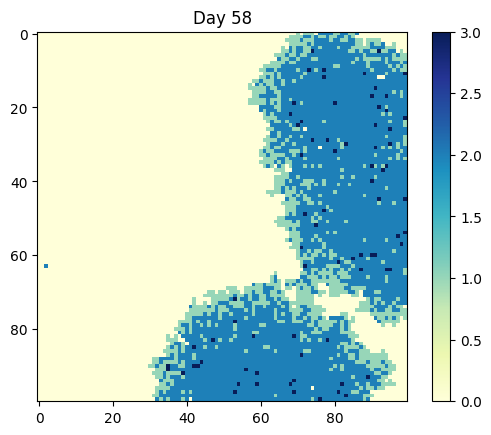

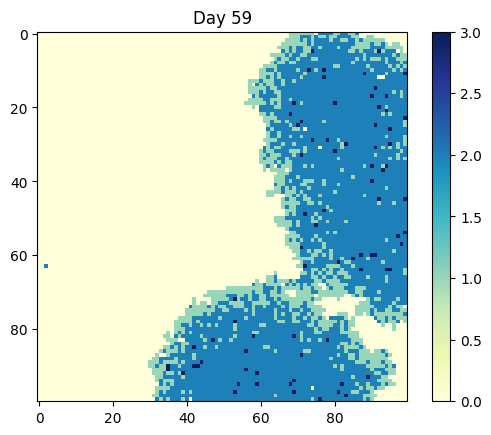

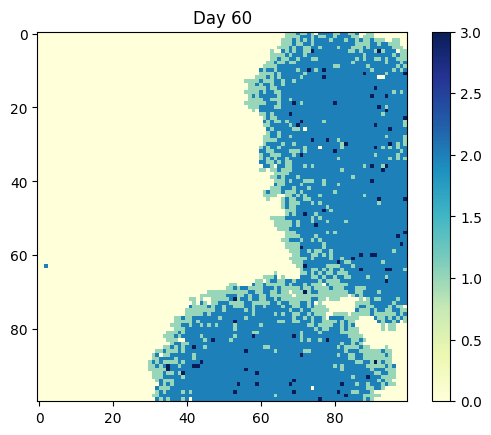

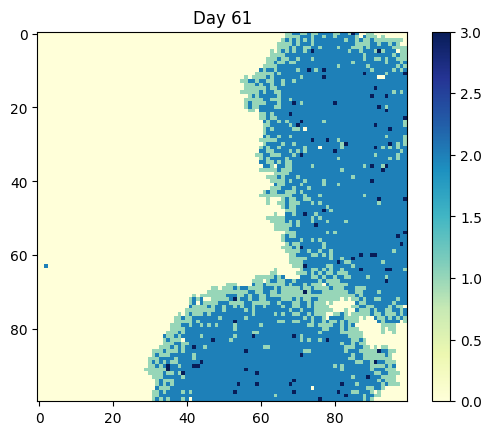

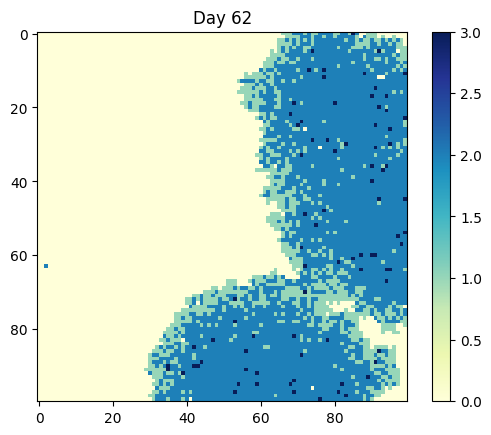

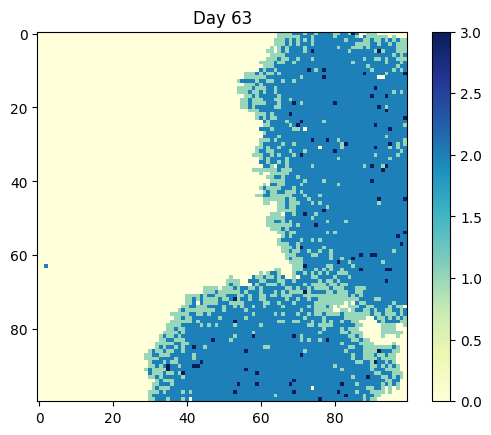

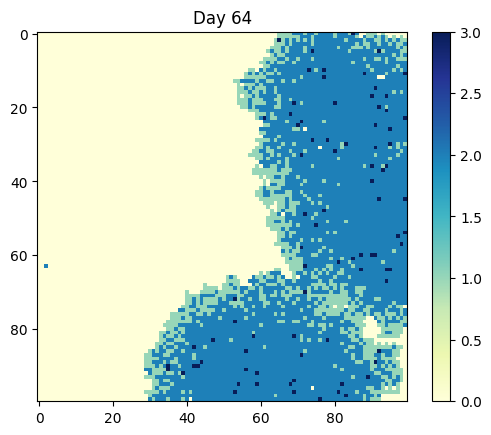

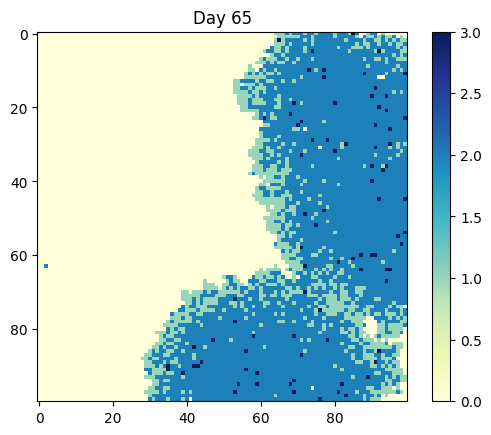

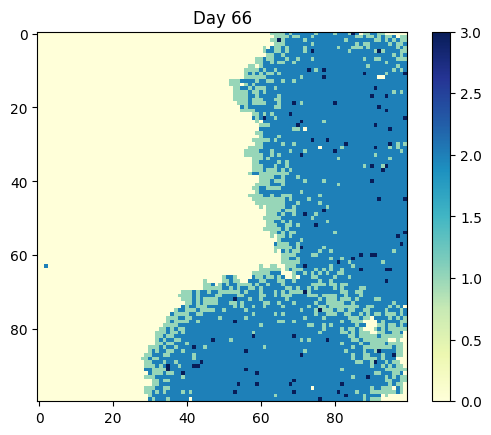

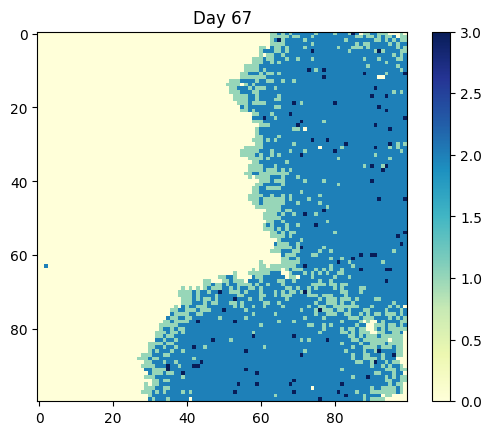

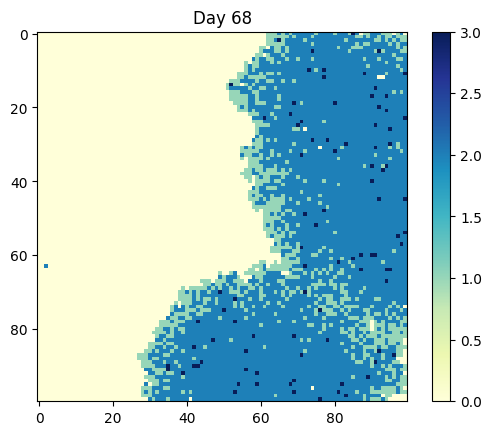

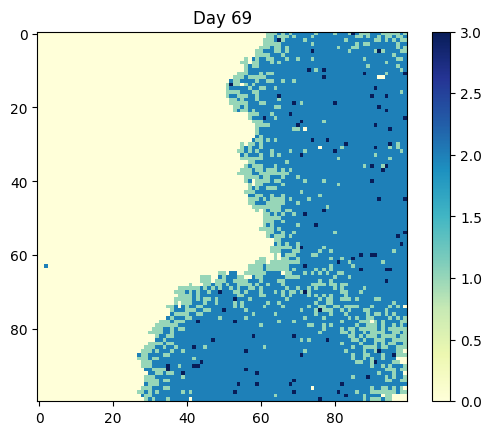

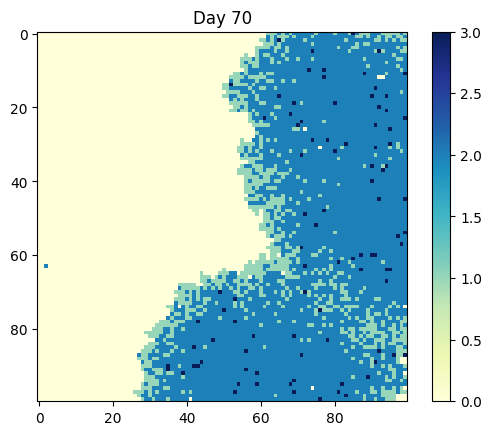

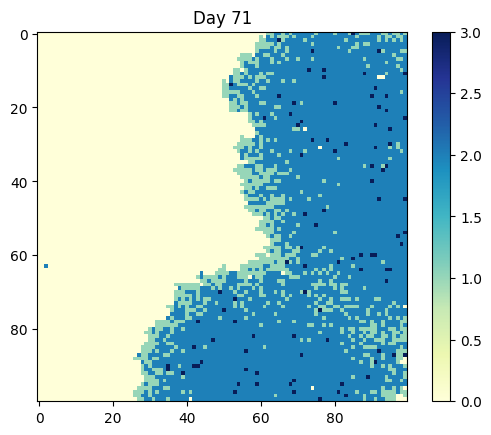

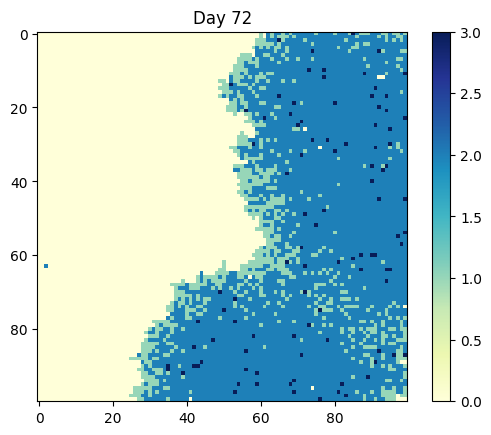

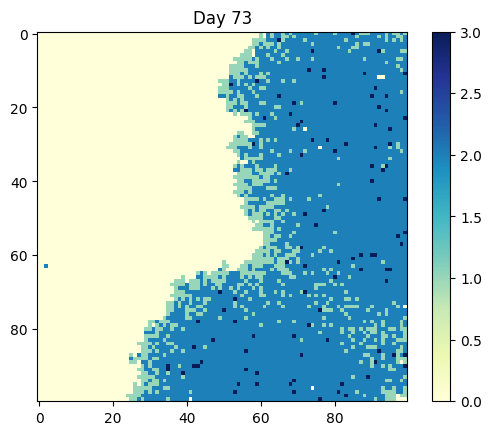

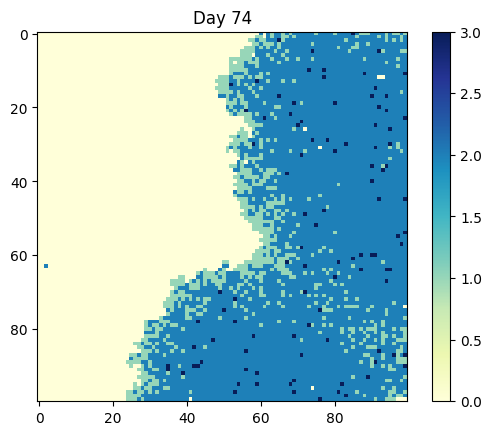

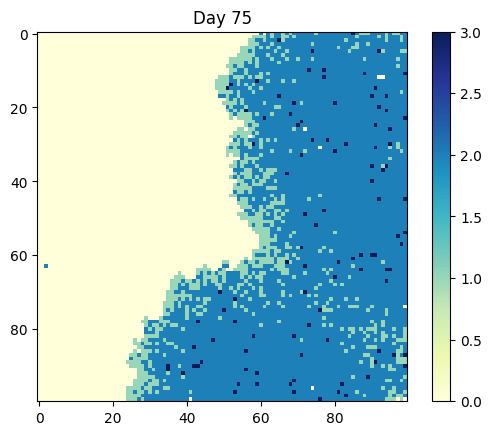

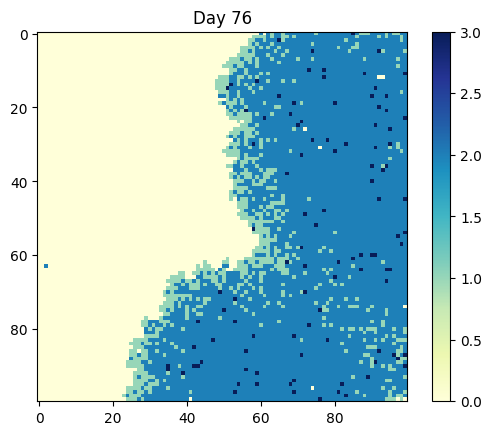

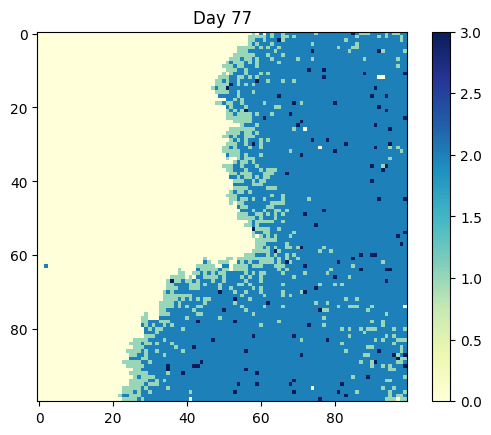

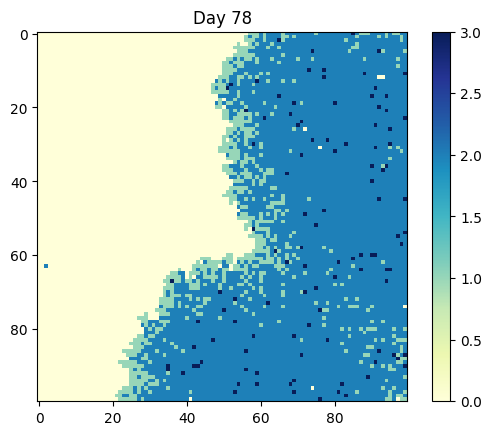

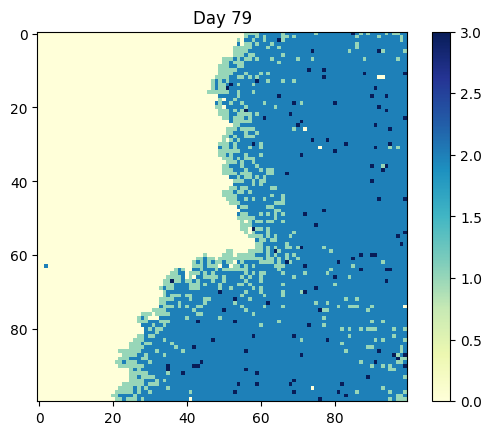

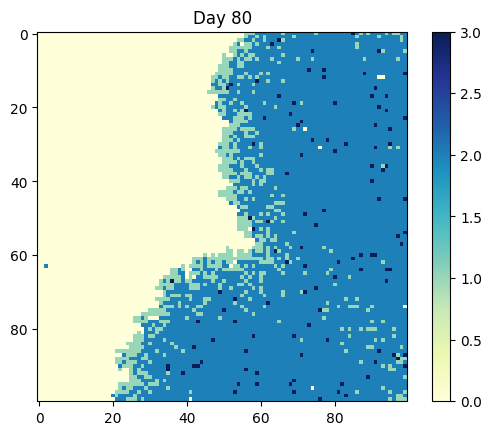

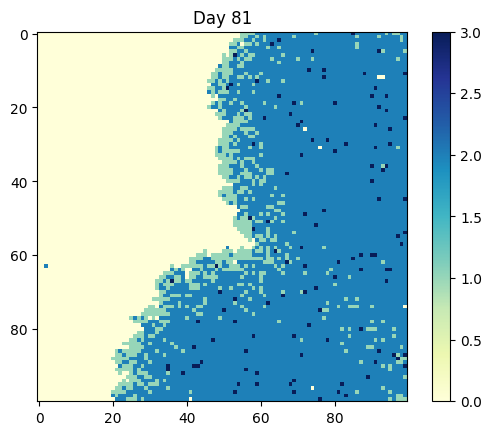

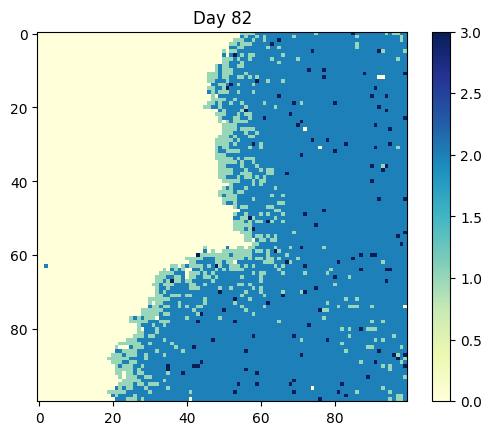

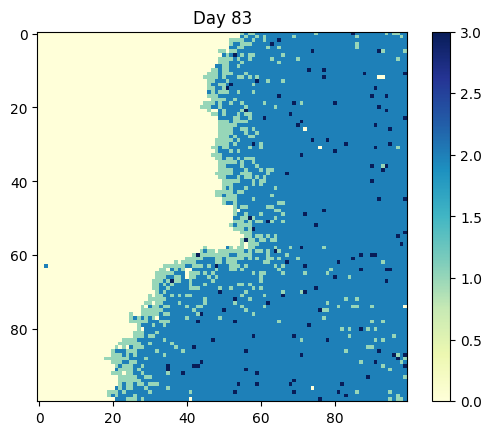

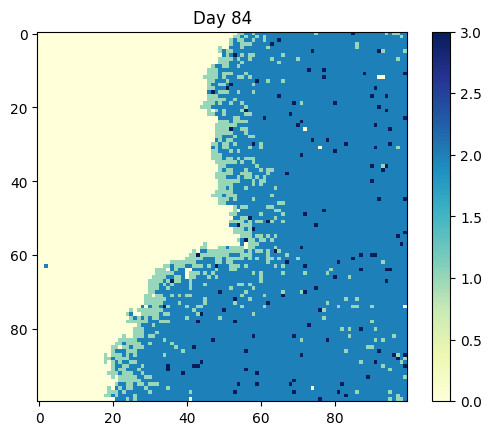

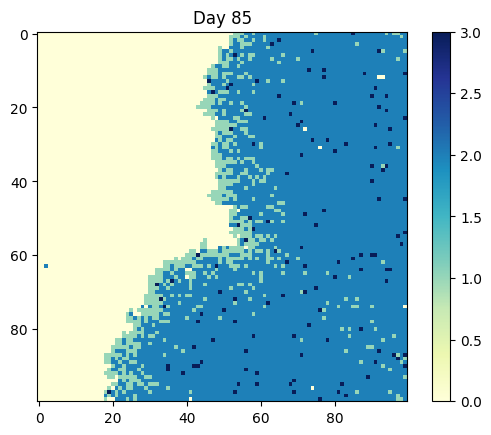

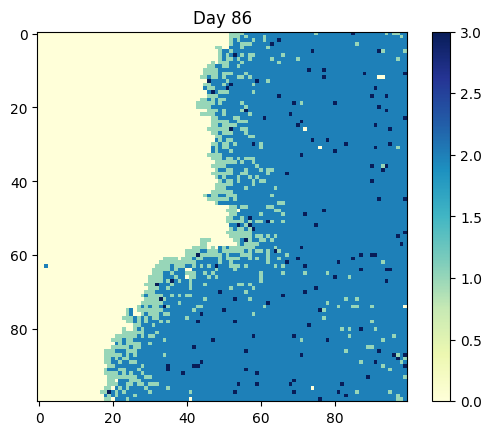

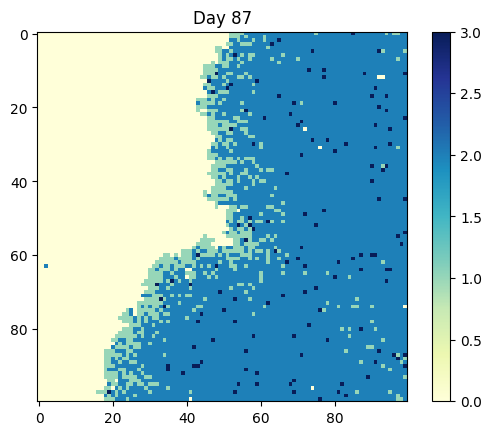

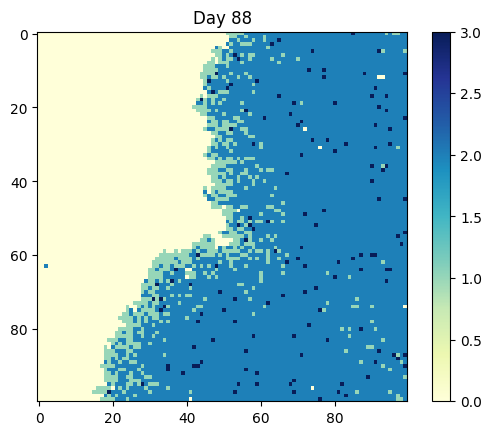

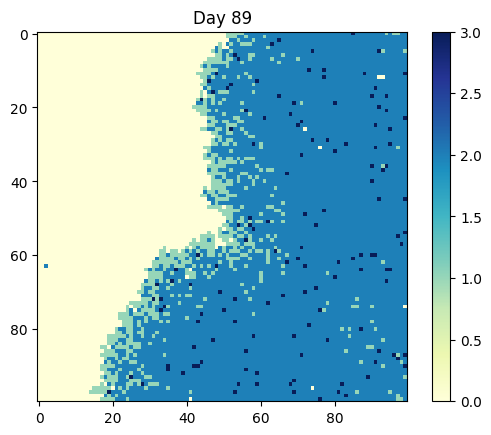

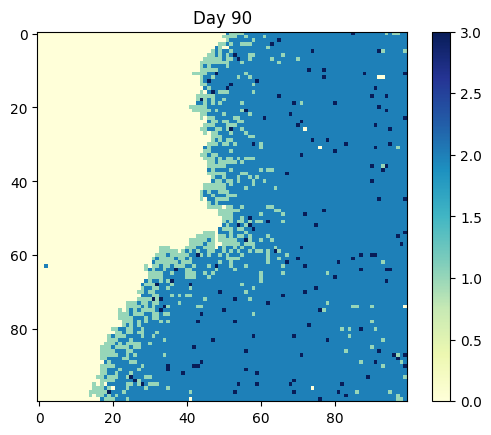

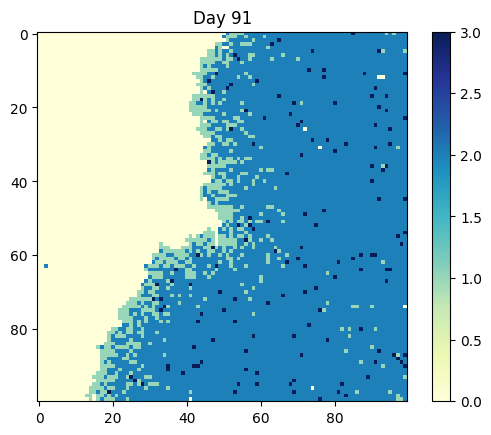

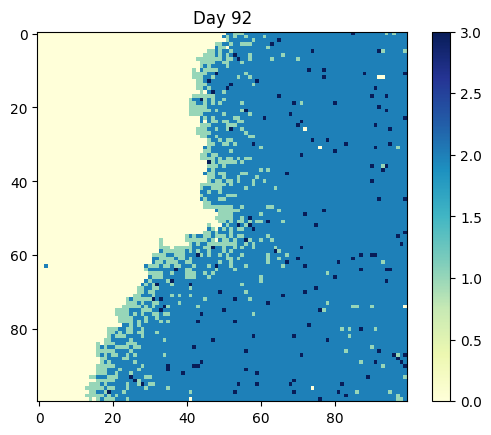

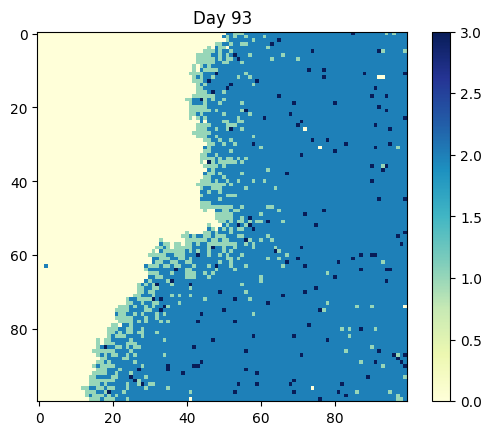

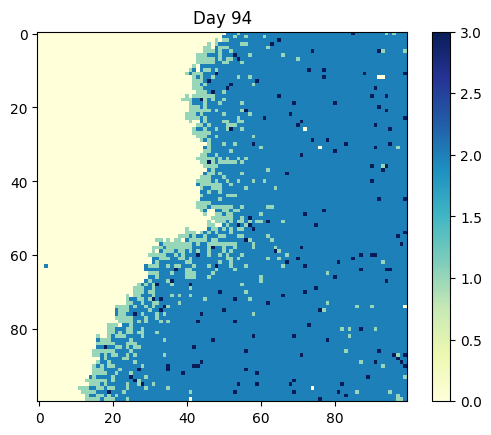

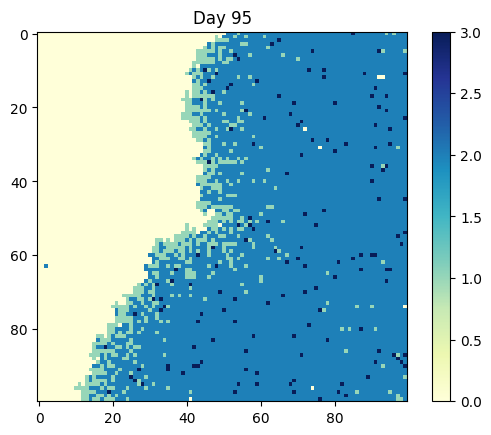

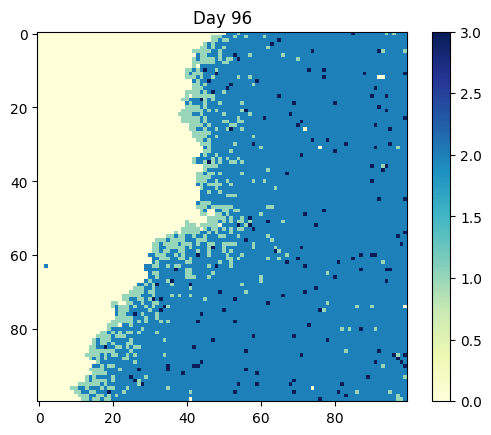

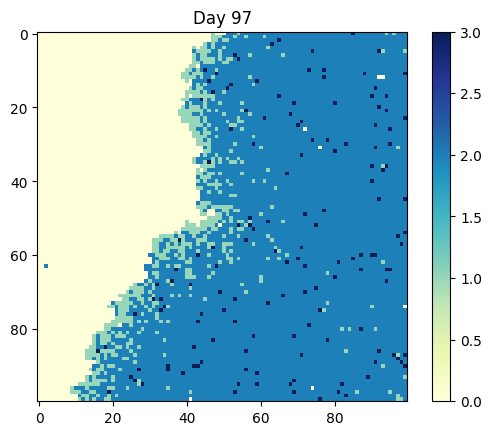

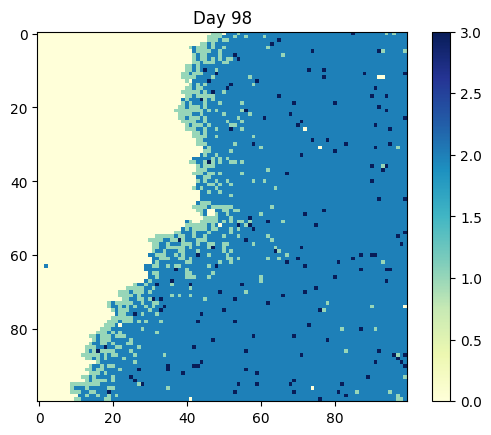

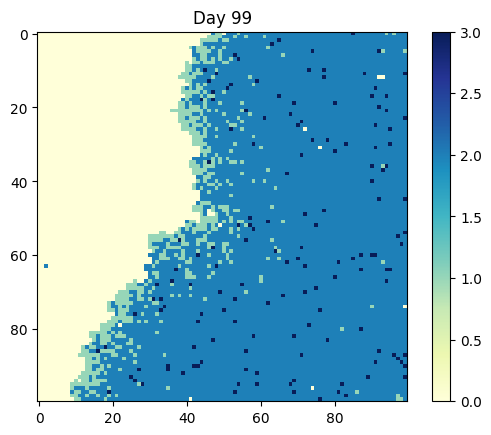

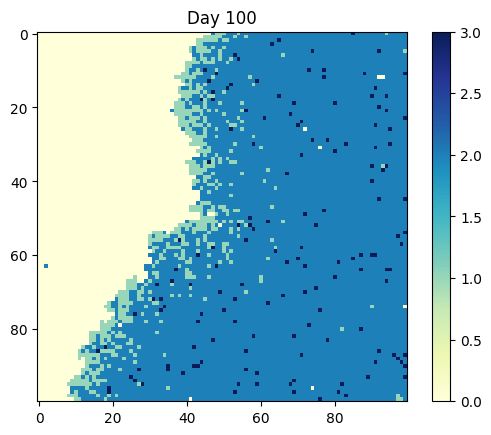

In [41]:
# this is the working code, (ish) i just want to animate on one window but it seems like nothing i do works
import numpy as np
import matplotlib.pyplot as plt

# Parameters
GRID_SIZE = 100
INITIAL_INFECTED = 5
TRANSMISSION_PROBABILITY = 0.3
RECOVERY_PROBABILITY = 0.1  # Probability of recovery
MORTALITY = 0.02  # Probability of death
DAYS_TO_RECOVER = 14  # Number of days for recovery

# Define states
SUSCEPTIBLE = 0
INFECTED = 1
RECOVERED = 2
DEAD = 3

def initialize_grid():
    return np.zeros((GRID_SIZE, GRID_SIZE))

def randomly_infect(grid):
    indices = np.random.choice(range(GRID_SIZE * GRID_SIZE), size=INITIAL_INFECTED, replace=False)
    x, y = indices // GRID_SIZE, indices % GRID_SIZE
    grid[x, y] = INFECTED
    return grid

# Define neighborhood kernel
Neighborhood = np.array([[1, 0], [0, 1], [-1, 0], [0, -1]])

def update_grid(grid):
    new_grid = np.copy(grid)
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            if grid[i, j] == INFECTED:
                # Try to infect susceptible neighbors
                for dx, dy in Neighborhood: #difference of x and y
                    ni, nj = i + dx, j + dy
                    if 0 <= ni < GRID_SIZE and 0 <= nj < GRID_SIZE and grid[ni, nj] == SUSCEPTIBLE and np.random.rand() < TRANSMISSION_PROBABILITY:
                        new_grid[ni, nj] = INFECTED
                # Check for recovery or death
                if np.random.rand() < RECOVERY_PROBABILITY:
                    new_grid[i, j] = DEAD if np.random.rand() < MORTALITY else RECOVERED
    return new_grid

def display_grid(grid, day):
    plt.imshow(grid, cmap='YlGnBu')
    plt.colorbar()
    plt.title(f'Day {day}')
    plt.show()

def main():
    grid = initialize_grid()
    grid = randomly_infect(grid)
    display_grid(grid, 0)

    for day in range(1, 101):
        grid = update_grid(grid)
        display_grid(grid, day)

if __name__ == "__main__":
    main()